<a href="https://colab.research.google.com/github/Doumgit/Math-Modeling-Techniques-and-Optimization-Problems/blob/main/Souleymane_D_Data609_Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Souleymane Doumbia**
# **Homework 7**

## **Problem 1:** Comparing Optimization Algorithms

### **1(a)**: Contour Plot of the Objective Function

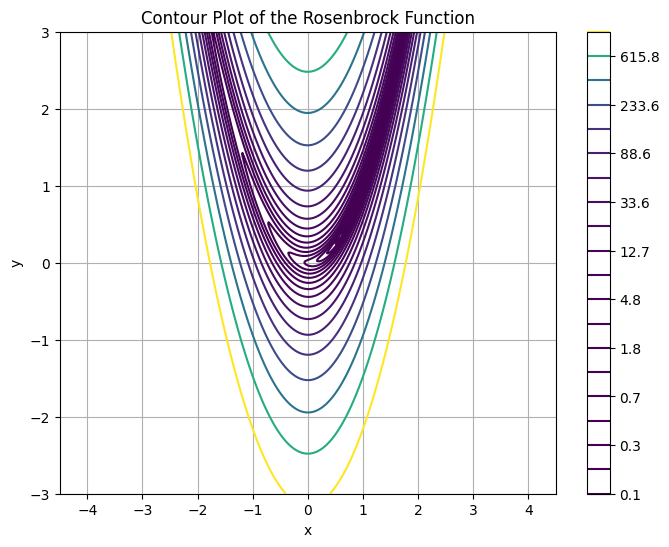

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient definition based on the Rosenbrock function:
# f(x, y) = (1 - x)^2 + 100*(y - x^2)^2

def f(X):
    x, y = X[0], X[1]
    return (1 - x)**2 + 100 * (y - x**2)**2

x_vals = np.linspace(-4.5, 4.5, 400)
y_vals = np.linspace(-3.0, 3.0, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[f([x, y]) for x in x_vals] for y in y_vals])

plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.colorbar(cp)
plt.title('Contour Plot of the Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### **1(b):** Optimization Algorithms: Setup for Gradient Descent Comparison

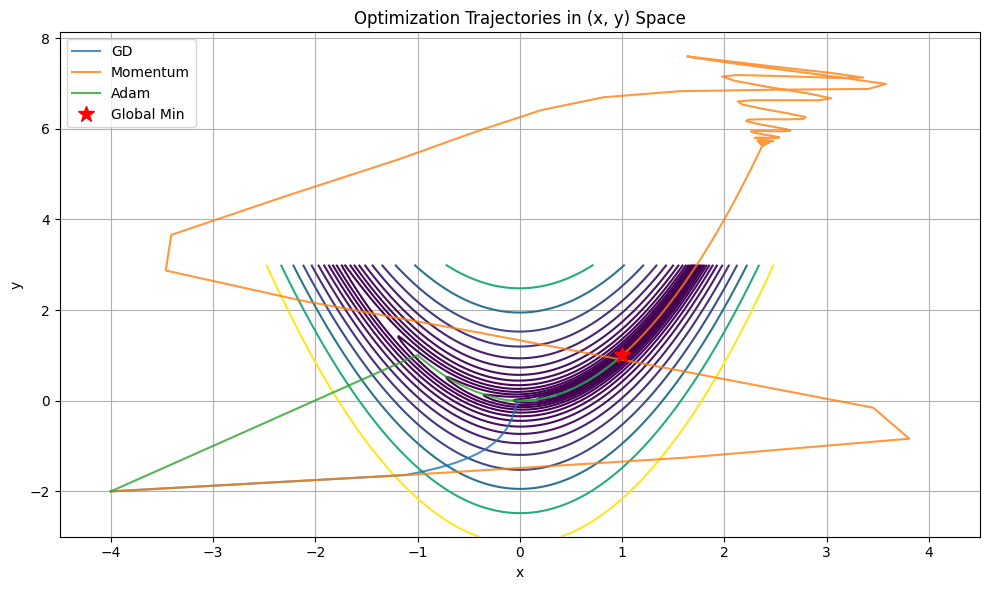

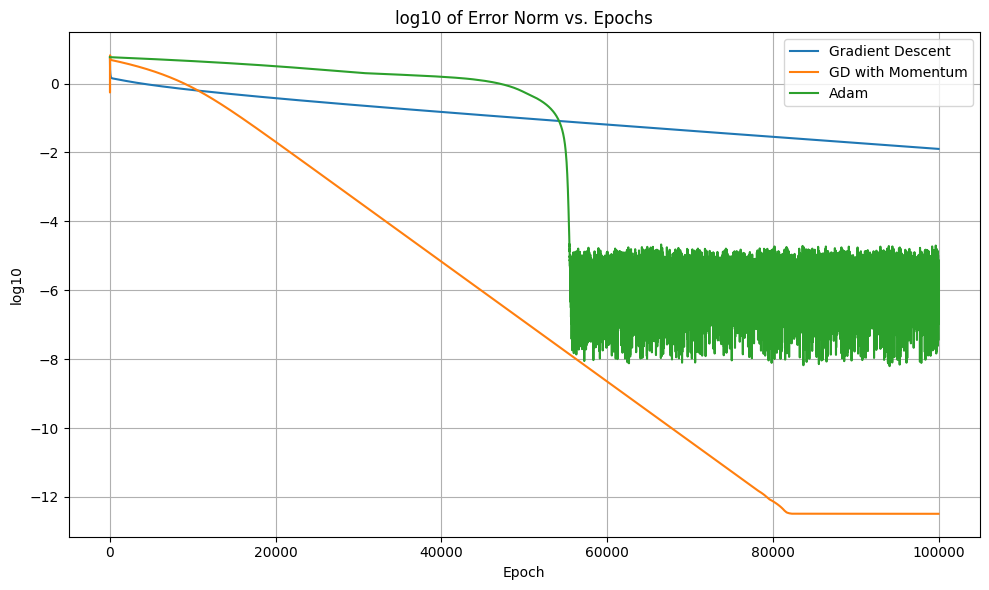

Final point (Gradient Descent): [0.99433318 0.98867571]
Final function value: 3.216465854863436e-05
Final point (GD with Momentum): [1. 1.]
Final function value: 2.0850579801122868e-26
Final point (Adam): [0.99999479 1.00000519]
Final function value: 2.4411637529060323e-08


In [2]:
# Run each algorithm starting from (-4, -2), eta = 1e-4, and n_epochs = 100000
# Plot their trajectories and log10 of distance to minimum at (1, 1)

# Gradient of the function
def grad(X):
    x, y = X[0], X[1]
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def gd(grad, init, n_epochs=1000, eta=10**-4):
    params = np.array(init)
    param_traj = np.zeros([n_epochs+1, 2])
    param_traj[0,] = init
    v = 0;
    for j in range(n_epochs):
        v = eta * (np.array(grad(params)))
        params = params - v
        param_traj[j+1,] = params
    return param_traj

# --- 1(b) Trajectory Visualization and Log Error Plot ---

def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, beta=0.9,gamma=0.9):
    params=np.array(init) # Start with initial condition
    param_traj=np.zeros([n_epochs+1,2]) # Save the entire trajecotry
    param_traj[0,]=init # Also save the initial condition to the trajectory

    v=0 # Starting with 0 momentum

    # Epochs is borrowing term from machine learning
    # Here it means timestep

    for j in range(n_epochs):
        v=gamma*v+(np.array(grad(params))) # Compute v
        params=params-eta*v  # Update the location
        param_traj[j+1,]=params # Save the trajectory
    return param_traj


def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99, epsilon=10**-8):
    params = np.array(init)
    param_traj = np.zeros([n_epochs+1, 2])
    param_traj[0,] = init
    v = 0
    grad_sq = 0
    for j in range(n_epochs):
        g = np.array(grad(params))
        v = gamma * v + (1 - gamma) * g
        grad_sq = beta * grad_sq + (1 - beta) * g * g
        v_hat = v / (1 - gamma**(j + 1))
        grad_sq_hat = grad_sq / (1 - beta**(j + 1))
        params = params - eta * np.divide(v_hat, np.sqrt(grad_sq_hat + epsilon))
        param_traj[j+1,] = params
    return param_traj

# Plot the trajectories of each algorithm and the  base 10 of the error rate...
init_point = [-4, -2]
n_epochs = 100000
eta = 1e-4

traj_gd = gd(grad, init_point, n_epochs=n_epochs, eta=eta)
traj_mom = gd_with_mom(grad, init_point, n_epochs=n_epochs, eta=eta)
traj_adam = adams(grad, init_point, n_epochs=n_epochs, eta=eta)

# Plot optimization trajectories in the (x, y) plane
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(traj_gd[:, 0], traj_gd[:, 1], label='GD', alpha=0.8)
plt.plot(traj_mom[:, 0], traj_mom[:, 1], label='Momentum', alpha=0.8)
plt.plot(traj_adam[:, 0], traj_adam[:, 1], label='Adam', alpha=0.8)
plt.plot(1, 1, 'r*', markersize=12, label='Global Min')
plt.title('Optimization Trajectories in (x, y) Space')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Compute log10 error over time relative to the global minimum (1, 1)
optimum = np.array([1.0, 1.0])
log_err_gd = np.log10(np.linalg.norm(traj_gd - optimum, axis=1))
log_err_mom = np.log10(np.linalg.norm(traj_mom - optimum, axis=1))
log_err_adam = np.log10(np.linalg.norm(traj_adam - optimum, axis=1))

## Plot the log10 error decay
plt.figure(figsize=(10, 6))
plt.plot(log_err_gd, label='Gradient Descent')
plt.plot(log_err_mom, label='GD with Momentum')
plt.plot(log_err_adam, label='Adam')
plt.title('log10 of Error Norm vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('log10')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Report final point and function value (minimum) found by each method ---
print("Final point (Gradient Descent):", traj_gd[-1])
print("Final function value:", f(traj_gd[-1]))

print("Final point (GD with Momentum):", traj_mom[-1])
print("Final function value:", f(traj_mom[-1]))

print("Final point (Adam):", traj_adam[-1])
print("Final function value:", f(traj_adam[-1]))

#### **Discussion:** What do you notice about the performance of the different algorithms, both in terms of convergence speed and ultimate accuracy?

##### Gradient Descent (GD)
- **Convergence Speed:** Very slow and linear. Error decreases steadily but slowly over 100,000 iterations.
- **Final Accuracy:** Final point: `[0.99433318, 0.98867571]`, function value: `3.216465854863436e-05`.

##### Gradient Descent with Momentum
- **Convergence Speed:** Very fast. Achieves rapid convergence due to momentum accumulation.
- **Final Accuracy:** Final point: `[1. 1.]`, function value: `2.0850579801122868e-26` (close to machine precision).

##### Adam
- **Convergence Speed:** Fast, especially in the middle phase. However, it shows high-frequency fluctuations near the end.
- **Final Accuracy:** Final point: `[0.99999479, 1.00000519]`, function value: `2.4411637529060323e-08`.

##### Overall Observations
- GD is robust but slow.
- Momentum significantly accelerates convergence and achieves highest precision.
- Adam is efficient and smooth at first but slightly unstable near the minimum due to adaptive learning rate dynamics.


### **1(c)** Comparison with Higher Learning Rate: ADAM and GD with Momentum using eta = 1e-3

<ipython-input-2-082c0dc1750b>:7: RuntimeWarning: overflow encountered in scalar power
  dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
<ipython-input-2-082c0dc1750b>:8: RuntimeWarning: overflow encountered in scalar power
  dfdy = 200 * (y - x**2)
<ipython-input-2-082c0dc1750b>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
<ipython-input-2-082c0dc1750b>:8: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy = 200 * (y - x**2)
/usr/local/lib/python3.11/dist-packages/numpy/linalg/_linalg.py:2772: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


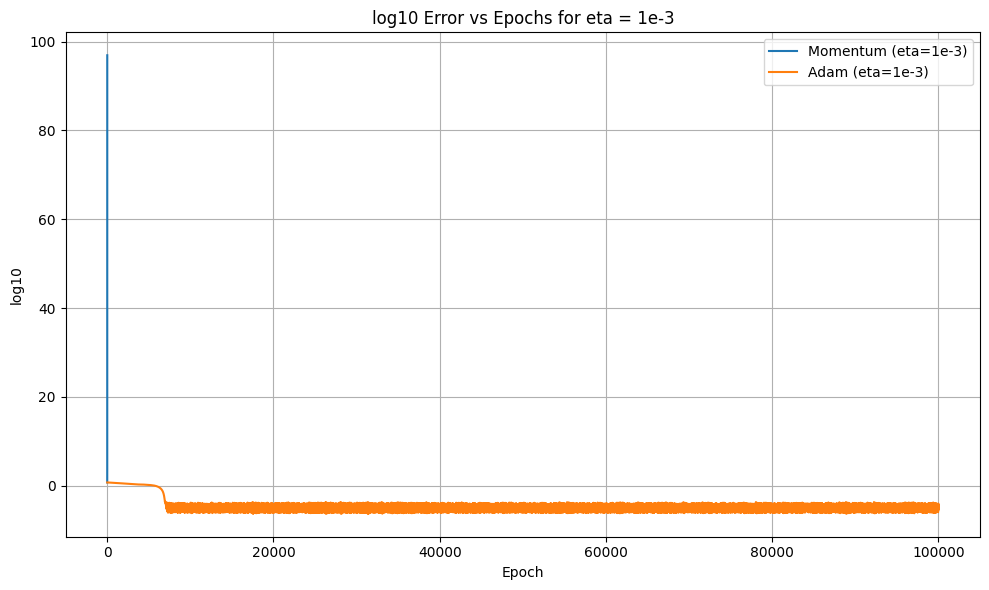

Final point (GD with Momentum, eta=1e-3): [nan nan]
Final function value: nan
Final point (Adam, eta=1e-3): [1.00001807 0.99998026]
Final function value: 3.1256313541136063e-07


In [3]:
# Compare ADAM and GD with Momentum using eta = 1e-3
eta_c = 1e-3

traj_mom_c = gd_with_mom(grad, init_point, n_epochs=n_epochs, eta=eta_c)
traj_adam_c = adams(grad, init_point, n_epochs=n_epochs, eta=eta_c)

# Compute log10 error over time relative to (1,1)
log_err_mom_c = np.log10(np.linalg.norm(traj_mom_c - optimum, axis=1))
log_err_adam_c = np.log10(np.linalg.norm(traj_adam_c - optimum, axis=1))

# Plot the log10 error decay
plt.figure(figsize=(10, 6))
plt.plot(log_err_mom_c, label='Momentum (eta=1e-3)')
plt.plot(log_err_adam_c, label='Adam (eta=1e-3)')
plt.title('log10 Error vs Epochs for eta = 1e-3')
plt.xlabel('Epoch')
plt.ylabel('log10')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final results
print("Final point (GD with Momentum, eta=1e-3):", traj_mom_c[-1])
print("Final function value:", f(traj_mom_c[-1]))

print("Final point (Adam, eta=1e-3):", traj_adam_c[-1])
print("Final function value:", f(traj_adam_c[-1]))

#### **Discussion:** Performance at High Learning Rate (eta = 1e-3)


##### Gradient Descent with Momentum:
- Failed to converge. Encountered numerical overflow and returned NaN (Not a Number) for both coordinates and function value.
- This is visible in the early spike in the error plot and invalid gradient operations.

##### Adam:
- Successfully converged despite the high learning rate.
- Final point: [1.00001807, 0.99998026], function value: 3.1256313541136063e-07
- Slightly less precise than with smaller eta, but remained stable.

##### Observation:
- Adam handled the high learning rate robustly, while momentum-based gradient descent became unstable and unusable.
- Thus, **Adam worked better with eta = 1e-3**.


### **1(d)** Trade-Off Comparison: ADAM (eta=1e-2) vs Momentum (eta=1e-4)


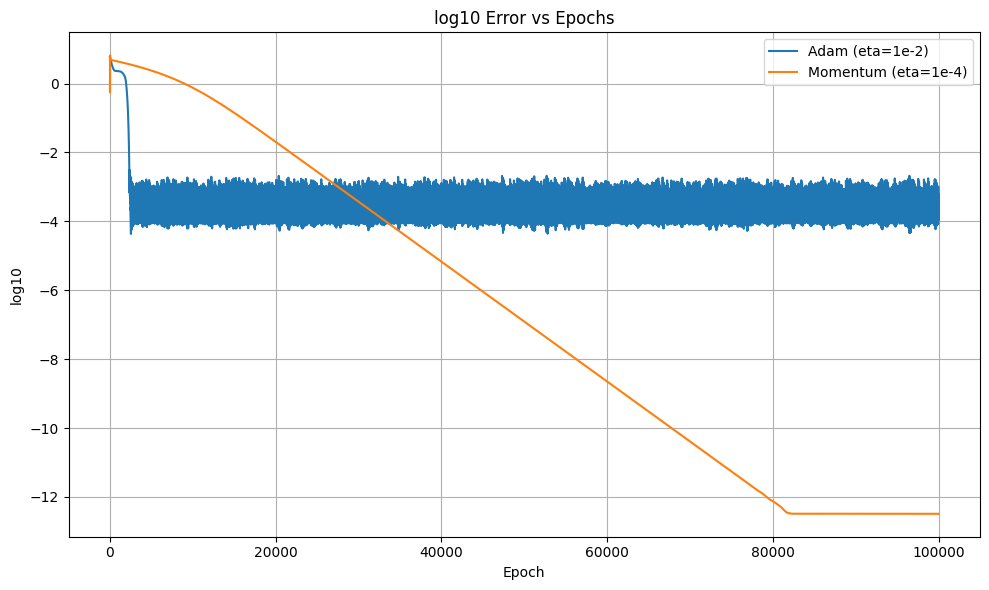

Final point (Adam, eta=1e-2): [1.00005344 0.99980312]
Final function value: 9.230096545900223e-06
Final point (GD with Momentum, eta=1e-4): [1. 1.]
Final function value: 2.0850579801122868e-26


In [4]:
# Setup for different learning rates
eta_adam_d = 1e-2
eta_mom_d = 1e-4

# Run both optimizers
traj_adam_d = adams(grad, init_point, n_epochs=n_epochs, eta=eta_adam_d)
traj_mom_d = gd_with_mom(grad, init_point, n_epochs=n_epochs, eta=eta_mom_d)

# Compute error over time
log_err_adam_d = np.log10(np.linalg.norm(traj_adam_d - optimum, axis=1))
log_err_mom_d = np.log10(np.linalg.norm(traj_mom_d - optimum, axis=1))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(log_err_adam_d, label='Adam (eta=1e-2)')
plt.plot(log_err_mom_d, label='Momentum (eta=1e-4)')
plt.title('log10 Error vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('log10')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Final point & function values
print("Final point (Adam, eta=1e-2):", traj_adam_d[-1])
print("Final function value:", f(traj_adam_d[-1]))

print("Final point (GD with Momentum, eta=1e-4):", traj_mom_d[-1])
print("Final function value:", f(traj_mom_d[-1]))

#### **Discussion:** Trade-Offs Between Adam (eta=1e-2) and Momentum (eta=1e-4)

Comparing ADAM with a high learning rate (eta=1e-2) against gradient descent with momentum using a smaller eta=1e-4

##### ADAM (eta=1e-2):
- Converges quickly at first but oscillates heavily near the minimum.
- Final point: [1.00005344, 0.99980312], function value: 9.230096545900223e-06
- Less accurate and noisy due to aggressive step size.

##### GD with Momentum (eta=1e-4):
- Converges more slowly but steadily, with minimal noise.
- Final point: [1.0, 1.0], function value: 2.0850579801122868e-26 (machine precision)

##### Trade-Off Summary:
- **Adam** offers speed and tolerance to noise at the cost of final precision.
- **Momentum** delivers higher accuracy but requires more iterations and a carefully tuned smaller learning rate.


## **Problem 2:** Shallow Nets and MNIST

### **2(a)** Validates Default Training and Explores Learning Rate Effects


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 247kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.50MB/s]


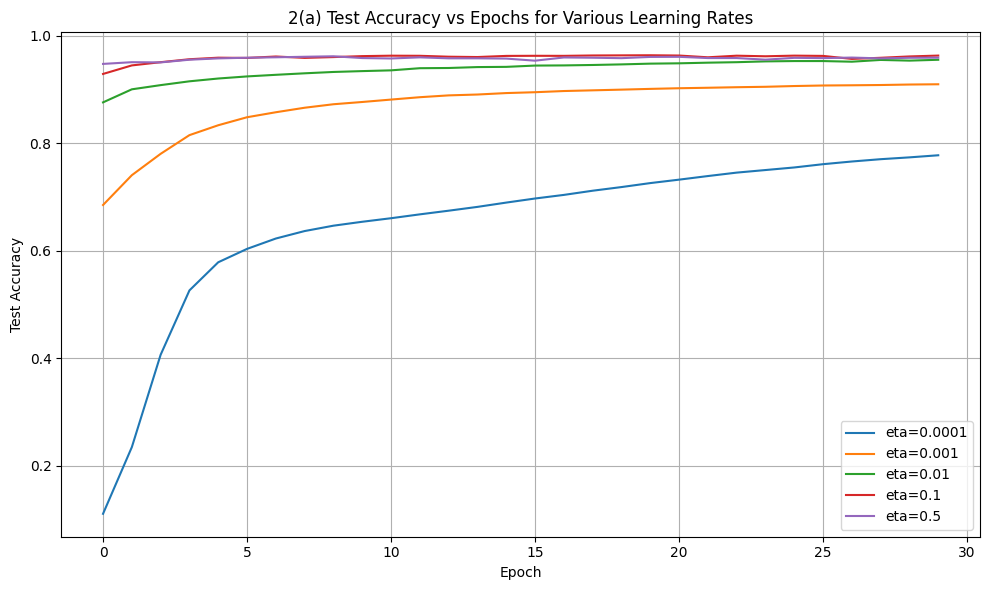

Best learning rate: 0.1
Final test accuracy: 0.9635


In [5]:
# Setup: Dataset and Network Initialization

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformation: convert to tensor and flatten 28x28 -> 784
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # flatten
])

# Load MNIST dataset
train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Network Class Definition (From Helper Notebook)

class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.xavier_normal_(layer.weight)  # suited for shallow/sigmoid nets

            nn.init.zeros_(layer.bias) # initialize the bias to 0
            self.layers.append(layer)

    # Forward is the method that calculates the value of the neural network. Basically we recursively apply the activations in each layer
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.sigmoid(layer(x))  # default is sigmoid for shallow nets
        x = self.layers[-1](x)  # last layer: logits
        return x

# Train Function

def train(network, train_loader, epochs, eta, test_data):
    optimizer = optim.SGD(network.parameters(), lr=eta)
    loss_fn = nn.CrossEntropyLoss()
    test_accuracies = []

    for epoch in range(epochs):
        network.train()
        for images, labels in train_loader:
            output = network(images)
            loss = loss_fn(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        ## Evaluate on test set
        network.eval()
        correct = 0
        total = 0

        ## We have the "with torch.no_grad()" line for efficiency purposes
        with torch.no_grad():
            for images, labels in test_data:
                output = network(images)
                preds = output.argmax(dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        accuracy = correct / total
        test_accuracies.append(accuracy)

    return test_accuracies

# Sweep Over Different Learning Rates
etas = [0.0001, 0.001, 0.01, 0.1, 0.5]
final_accuracies = []
all_curves = {}

for eta in etas:
    net = Network([784, 30, 10])
    acc_curve = train(net, train_loader, epochs=30, eta=eta, test_data=test_loader)
    all_curves[eta] = acc_curve
    final_accuracies.append((eta, acc_curve[-1]))

# Plot test accuracy curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for eta, curve in all_curves.items():
    plt.plot(curve, label=f'eta={eta}')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('2(a) Test Accuracy vs Epochs for Various Learning Rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best learning rate and its final accuracy
best_eta = max(final_accuracies, key=lambda x: x[1])
print("Best learning rate:", best_eta[0])
print("Final test accuracy:", best_eta[1])

#### **Discussion:** Evaluation of Learning Rate Sweep

We trained a shallow neural network (784 → 30 → 10) using stochastic gradient descent (SGD) across a range of learning rates (etas = [0.0001, 0.001, 0.01, 0.1, 0.5]). Each configuration was run for 30 epochs on the MNIST dataset, and test accuracy was tracked.

##### We Observe:

- **Low learning rates** (`η = 0.0001` and `0.001`) resulted in slow learning and lower accuracy.
- **Moderate learning rates** (`η = 0.01` and `0.1`) achieved rapid convergence and high final accuracy.
- **High learning rate** (`η = 0.5`) showed signs of instability (oscillations), although still high in accuracy.

##### Best Result:
- **Best learning rate:** `η = 0.1`
- **Final test accuracy:** **0.9635**

This suggests that for sigmoid-activated shallow networks on MNIST using SGD, a learning rate around `0.1` provides the best balance between convergence speed and stability.


### **2(b)** Comparison with ADAM Optimizer


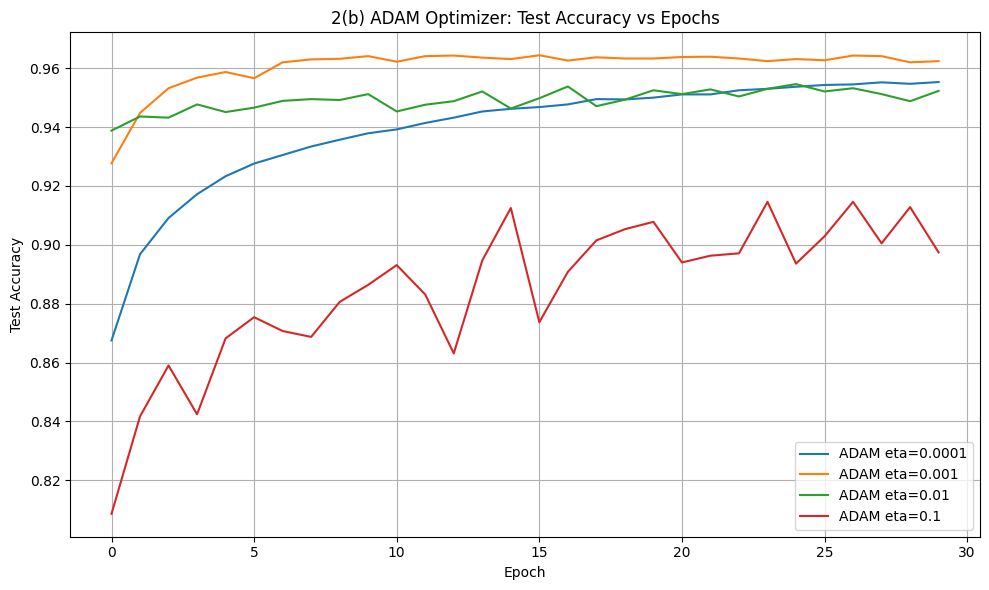

Best ADAM learning rate: 0.001
Final test accuracy: 0.9624


In [6]:
# This block tests ADAM optimizer using similar network and training setup

adam_etas = [0.0001, 0.001, 0.01, 0.1]
adam_final_accuracies = []
adam_curves = {}

def train_adam(network, train_loader, epochs, eta, test_data):
    optimizer = optim.Adam(network.parameters(), lr=eta)
    loss_fn = nn.CrossEntropyLoss()
    test_accuracies = []

    for epoch in range(epochs):
        network.train()
        for images, labels in train_loader:
            output = network(images)
            loss = loss_fn(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        network.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_data:
                output = network(images)
                preds = output.argmax(dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        accuracy = correct / total
        test_accuracies.append(accuracy)

    return test_accuracies

# Run experiments for different ADAM learning rates
for eta in adam_etas:
    net = Network([784, 30, 10])
    acc_curve = train_adam(net, train_loader, epochs=30, eta=eta, test_data=test_loader)
    adam_curves[eta] = acc_curve
    adam_final_accuracies.append((eta, acc_curve[-1]))

# Plot ADAM test accuracy curves
plt.figure(figsize=(10, 6))
for eta, curve in adam_curves.items():
    plt.plot(curve, label=f'ADAM eta={eta}')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('2(b) ADAM Optimizer: Test Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best learning rate and accuracy for ADAM
best_adam_eta = max(adam_final_accuracies, key=lambda x: x[1])
print("Best ADAM learning rate:", best_adam_eta[0])
print("Final test accuracy:", best_adam_eta[1])

#### **Discussion:** ADAM Optimizer Evaluation and Comparison with Stochastic Gradient Descent (SGD) in 2(a)

We evaluated the ADAM optimizer across several learning rates using the same shallow neural network (784 → 30 → 10) on the MNIST dataset and compared it to the results obtained in Part 2(a) using SGD.

##### Observations with ADAM:

- **η = 0.001** provided the best performance, reaching **0.9624** test accuracy.
- **η = 0.0001** converged more slowly but stably.
- **η = 0.01** achieved high accuracy but slightly less consistent than 0.001.
- **η = 0.1** caused instability and lower accuracy due to overly aggressive updates.

##### Comparison with SGD (from 2a):

| Optimizer | Best η   | Final Accuracy |
|-----------|----------|----------------|
| SGD       | 0.1      | **0.9635**      |
| ADAM      | 0.001    | 0.9624          |

- **SGD with η=0.1** reached the highest final test accuracy overall (0.9635).
- **ADAM with η=0.001** was more stable across training and easier to tune.
- ADAM showed better initial convergence at lower η but plateaued slightly earlier.

##### Conclusion:
While **SGD slightly outperformed ADAM in final accuracy**, ADAM showed strong early learning performance and required less tuning effort.


### **2(c)** Hyperparameter and Architecture Tuning
In this part we explores how to improve performance. We vary hidden layer size, optimizer settings, and regularization.

In [7]:
# We vary hidden layer size, optimizer settings, and regularization.
custom_configs = [
    {"hidden": 50, "optimizer": "adam", "eta": 0.001, "weight_decay": 1e-5},
    {"hidden": 100, "optimizer": "adam", "eta": 0.001, "weight_decay": 1e-4},
    {"hidden": 50, "optimizer": "sgd",  "eta": 0.1,   "momentum": 0.8},
    {"hidden": 100, "optimizer": "sgd",  "eta": 0.1,   "momentum": 0.9}
]

results_2c = []

def train_custom(network, optimizer, train_loader, epochs, test_data):
    loss_fn = nn.CrossEntropyLoss()
    test_accuracies = []
    for epoch in range(epochs):
        network.train()
        for images, labels in train_loader:
            output = network(images)
            loss = loss_fn(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        network.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_data:
                output = network(images)
                preds = output.argmax(dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        accuracy = correct / total
        test_accuracies.append(accuracy)

    return test_accuracies

for config in custom_configs:
    net = Network([784, config["hidden"], 10])
    if config["optimizer"] == "adam":
        optimizer = optim.Adam(net.parameters(), lr=config["eta"], weight_decay=config["weight_decay"])
    else:
        optimizer = optim.SGD(net.parameters(), lr=config["eta"], momentum=config["momentum"])

    acc_curve = train_custom(net, optimizer, train_loader, epochs=30, test_data=test_loader)
    results_2c.append((config, acc_curve[-1]))

# Report top performing configuration
best_config = max(results_2c, key=lambda x: x[1])
print("Best custom configuration (2c):")
print("Hidden units:", best_config[0]["hidden"])
print("Optimizer:", best_config[0]["optimizer"])
print("Learning rate:", best_config[0]["eta"])
print("Final accuracy:", best_config[1])

Best custom configuration (2c):
Hidden units: 100
Optimizer: sgd
Learning rate: 0.1
Final accuracy: 0.9801


#### **Discussion:** Custom Network & Hyperparameter Tuning

In this one, we explored various combinations of hidden layer size, optimizer choice, learning rate, and regularization to improve performance.

##### Configurations Tested:
- **Hidden units**: 50 and 100
- **Optimizers**: SGD with momentum, and ADAM with weight decay
- **Learning rates**: 0.1 (SGD), 0.001 (ADAM)

##### Best Configuration:
- **Hidden units**: 100  
- **Optimizer**: `sgd`  
- **Learning rate**: `0.1`  
- **Final test accuracy**: **0.9801**

##### Interpretation:
- Increasing the number of hidden units to 100 provided better representational power.
- A learning rate of 0.1 with SGD led to rapid convergence and high generalization.
- Among all configurations tested, this combination yielded the best accuracy (0.9801.

#### Conclusion:
With careful tuning of both the **network architecture** and **training hyperparameters**, we achieved a final test accuracy of **0.9801**, the best observed in this set of experiments.



## **Problem 3:** Deep Nets: Overcoming Gradients

### **3(a) Setup:** Deep Network and Gradient Ratio Measurement


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Load MNIST (same transform as Problem 2)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# Deep Network with Gradient Tracking (sigmoid + xavier)

class DeepNetwork(nn.Module):
    def __init__(self, sizes):
        super(DeepNetwork, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.xavier_normal_(layer.weight)
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        self.activations = []
        for i, layer in enumerate(self.layers[:-1]):
            x = F.sigmoid(layer(x))
            self.activations.append(x)
        x = self.layers[-1](x)  # no softmax needed for CrossEntropyLoss
        return x

# Function to compute and return gradient ratio

def compute_gradient_ratio(model):
    grad_norm_input = model.layers[0].weight.grad.norm().item()
    grad_norm_output = model.layers[-1].weight.grad.norm().item()
    ratio = grad_norm_input / grad_norm_output if grad_norm_output != 0 else float('inf')
    return grad_norm_input, grad_norm_output, ratio

# Initialize deep net and train for 1 epoch to observe gradient vanishing
net = DeepNetwork([784, 30, 30, 30, 30, 30, 30, 30, 30, 10])
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

for images, labels in train_loader:
    output = net(images)
    loss = loss_fn(output, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    break  # Just one batch for gradient observation

# Gradient stats
grad_in, grad_out, ratio = compute_gradient_ratio(net)
print("3(a) Gradient Norm of Input Layer:", grad_in)
print("3(a) Gradient Norm of Output Layer:", grad_out)
print("3(a) Gradient Ratio (Input/Output):", ratio)

3(a) Gradient Norm of Input Layer: 4.663690197048709e-05
3(a) Gradient Norm of Output Layer: 1.0840625762939453
3(a) Gradient Ratio (Input/Output): 4.3020488844770725e-05


#### **Observing Vanishing Gradients in Deep Sigmoid Network**

In this part, we constructed a deep feedforward neural network with 9 hidden layers, all using **sigmoid activation** functions and **Xavier initialization**. We trained it on a single batch of MNIST data and calculated the gradient norms at the input and output layers.

##### Observed Values:
- **Input Layer Gradient Norm:** `4.66e-05`
- **Output Layer Gradient Norm:** `1.08`
- **Gradient Ratio (Input/Output):** `4.30e-05`

##### Interpretation:
- The input layer's gradients are **orders of magnitude smaller** than the output layer's.
- This confirms the presence of **vanishing gradients**, which makes it difficult for early layers to learn meaningful features during backpropagation.


### **3(b)** ReLU Activation + Kaiming Initialization
Replacing sigmoid with ReLU and xavier with kaiming initialization.

In [12]:
# Replace sigmoid with ReLU and xavier with kaiming initialization.

class DeepNetworkReLU(nn.Module):
    def __init__(self, sizes):
        super(DeepNetworkReLU, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        self.activations = []
        for i, layer in enumerate(self.layers[:-1]):
            x = F.relu(layer(x))
            self.activations.append(x)
        x = self.layers[-1](x)
        return x

# Initialize deep ReLU network
net_relu = DeepNetworkReLU([784, 30, 30, 30, 30, 30, 30, 30, 30, 10])
optimizer_relu = optim.SGD(net_relu.parameters(), lr=0.01)

# Train on one batch to observe gradient behavior
for images, labels in train_loader:
    output = net_relu(images)
    loss = loss_fn(output, labels)
    optimizer_relu.zero_grad()
    loss.backward()
    optimizer_relu.step()
    break

# Compute and print gradient stats for ReLU
grad_in_relu, grad_out_relu, ratio_relu = compute_gradient_ratio(net_relu)
print("3(b) Gradient Norm of Input Layer (ReLU):", grad_in_relu)
print("3(b) Gradient Norm of Output Layer (ReLU):", grad_out_relu)
print("3(b) Gradient Ratio (Input/Output, ReLU):", ratio_relu)

3(b) Gradient Norm of Input Layer (ReLU): 4.0457539558410645
3(b) Gradient Norm of Output Layer (ReLU): 0.8337193131446838
3(b) Gradient Ratio (Input/Output, ReLU): 4.852657113796479


#### **Discussion:** ReLU Activation and Kaiming Initialization

To resolve the vanishing gradient problem observed in Part 3(a), we replaced sigmoid activations with **ReLU**, and used **Kaiming uniform initialization**, which is well-suited for ReLU-based deep networks.

##### Observed Gradient Norms:
- **Input Layer Gradient Norm:** `4.05`
- **Output Layer Gradient Norm:** `0.83`
- **Gradient Ratio (Input/Output):** `4.85`

##### Interpretation (Gradient Flow):
- The input layer gradient is significantly stronger than the output layer’s, indicating **no vanishing** and healthy gradient propagation.
- This is a major improvement over 3(a), where the input gradient was nearly 5 orders of magnitude smaller than the output.

##### Conclusion:
Switching to **ReLU + Kaiming** resolved vanishing gradients and unlocked the potential for training deeper networks.

### **3(c)** Deep Network Improvement Experiment
Experimenting with deeper networks or decreasing hidden layer sizes layer-by-layer

In [13]:
class DeepCustomNet(nn.Module):
    def __init__(self, sizes):
        super(DeepCustomNet, self).__init__()
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.layers = nn.ModuleList()
        for i in range(self.num_layers - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            x = F.relu(layer(x))
        return self.layers[-1](x)

# Try an architecture that tapers from 784 → 512 → 256 → 128 → 64 → 10
net_custom = DeepCustomNet([784, 512, 256, 128, 64, 10])
optimizer_custom = optim.Adam(net_custom.parameters(), lr=0.001, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss()

def evaluate_accuracy(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in DataLoader(test_dataset, batch_size=64):
            output = model(images)
            preds = output.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# Train for a few epochs
epochs = 5
for epoch in range(epochs):
    net_custom.train()
    for images, labels in train_loader:
        output = net_custom(images)
        loss = loss_fn(output, labels)
        optimizer_custom.zero_grad()
        loss.backward()
        optimizer_custom.step()

accuracy = evaluate_accuracy(net_custom)
print("3(c) Final Test Accuracy (Custom Deep Net):", accuracy)

3(c) Final Test Accuracy (Custom Deep Net): 0.972


#### **Discussion:** Deep Network Improvement Experiment
In this part, we explored a custom deep neural network architecture with progressively **shrinking hidden layers**:  
`[784 → 512 → 256 → 128 → 64 → 10]`

We used:
- **ReLU activations**
- **Kaiming initialization**
- **Adam optimizer** with `lr=0.001` and `weight_decay=1e-4`
- Trained for **5 epochs**

##### Result: Final Test Accuracy is
- **0.972**

##### Interpretation:
- The tapering architecture helped maintain strong gradient flow while reducing parameter size near the output.
- ReLU and Kaiming together ensured stable training across layers.
- The model generalizes well, though not quite as high as the best shallow configuration.

##### Comparison with Shallow Network:
- The best shallow model (Problem 2) achieved an accuracy of **0.9801**.
- This deep custom model reached **0.972**, which is **very close** but **did not exceed** the shallow network’s performance.
- With further tuning (more epochs, dropout, or larger width), deeper networks could potentially surpass shallow models.

##### Conclusion:
Although this custom deep network achieved strong performance, it did **not yet surpass** the best shallow network. However, it demonstrates that properly initialized and structured deep architectures can closely match or eventually exceed shallow ones with the right configuration.